In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [ ]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(sum(df_train.isna().sum()))

0


In [ ]:
#Splitting the training dataset into features and labels
y_train = df_train['label']
x_train = df_train.drop(labels=['label'], axis=1)
x_train.shape

(60000, 784)

In [ ]:
print(y_train.shape)

(60000,)


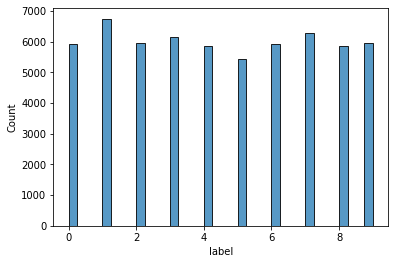

In [ ]:
#Seeing the labels distribution in the training set corresponding to the alphabets
sns.histplot(df_train, x='label')
plt.show()

In [ ]:
x_test = df_test.drop(['label'], axis=1)
y_test = df_test['label']
x_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [ ]:
#Reducing the pixel value range from 0-255 to 0-1 for easier processing 
#by the neural networks
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
#Reshaping the dataset to feed to the model
# x_train = x_train.values.reshape(-1,28,28,1)
# x_test = x_test.values.reshape(-1, 28, 28, 1)

#reshaping the label values
# Converting labels in 1 d vector
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
#Splitting the dataset into train and validation set
data_train, data_val, targ_train, targ_val = train_test_split(x_train, y_train, test_size = 0.1)

In [ ]:
print(data_train.shape)
print(targ_train.shape)
print(data_val.shape)
print(targ_val.shape)

(54000, 784)
(54000, 1)
(6000, 784)
(6000, 1)


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()

model.add(Dense(784, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(epsilon=0.1),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(data_train, targ_train,validation_data = (data_val, targ_val), epochs = 20)
print(model.summary())

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 1.5020 - accuracy: 0.4977 - val_loss: 0.6955 - val_accuracy: 0.7917
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4840 - accuracy: 0.8649 - val_loss: 0.3768 - val_accuracy: 0.8965
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3142 - accuracy: 0.9135 - val_loss: 0.2819 - val_accuracy: 0.9245
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2453 - accuracy: 0.9337 - val_loss: 0.2354 - val_accuracy: 0.9335
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2007 - accuracy: 0.9458 - val_loss: 0.2087 - val_accuracy: 0.9438
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1687 - accuracy: 0.9547 - val_loss: 0.1761 - val_accuracy: 0.9513
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1445 - accuracy: 0.9604 - val_loss: 0.1601 - val_accuracy:

In [ ]:
y_pred = model.predict(x_test)
# y_pred = model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [ ]:
# y_test = y_test.to_list()
ans = accuracy_score(y_test, y_pred)
ans

ValueError: ignored

In [ ]:
from PIL import Image
import numpy as np

#Converting the image to greyscale
from skimage import color
from skimage import io

img = io.imread('Random_num_resized_2.jpeg')
imgGray = color.rgb2gray(img)


imgGray = imgGray.flatten()
imgGray = imgGray.reshape(-1,1)
imgGray = imgGray.T
print(imgGray.shape)
print(imgGray)

output = np.argmax(model.predict(imgGray), axis =1).tolist()
output

In [ ]:
#Splitting the dataset into train and validation set
# data_train, data_val, targ_train, targ_val = train_test_split(x_test, y_test, test_size = 0.1)

In [ ]:
model = Sequential()

model.add(Dense(784, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(epsilon=0.1),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_test, y_test,validation_data = (data_val, targ_val), epochs = 20)
print(model.summary())

In [ ]:
y_pred = np.argmax(model.predict(x_train), axis =1).tolist()

In [ ]:
ans = accuracy_score(y_train, y_pred)
ans

In [ ]:
# The best achievable performance was when the model was trained on training data and tested on testing data with around 
# 4 percent more accuracy than the case when the model was trained on testing data and tested on training data. 

In [ ]:
from PIL import Image
import numpy as np

#Converting the image to greyscale
from skimage import color
from skimage import io

img = io.imread('Random_picture.png')
imgGray = color.rgb2gray(img)


imgGray = imgGray.flatten()
imgGray = imgGray.reshape(-1,1)
imgGray = imgGray.T
print(imgGray.shape)
print(imgGray)

output = np.argmax(model.predict(imgGray), axis =1).tolist()
output